In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
import pylab
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sts
import statsmodels.api as sms

In [30]:
A=pd.read_excel('cleaned_file.xlsx')

In [31]:
A.shape

(13354, 12)

In [32]:
A.drop(['Unnamed: 0','Additional_Info'], axis=1, inplace=True)

In [33]:
A.head()

,Airline,Arrival,Dep,Destination,Price,Source,Status,Total_Stops,Date_of_Journey(Month),Total_Time
0,IndiGo,Morning,Night,Delhi,3897.0,Banglore,Train,0,3,170
1,Air India,Noon,Morning,Banglore,7662.0,Kolkata,Train,2,5,445
2,Jet Airways,Morning,Morning,Cochin,13882.0,Delhi,Train,2,6,1140
3,IndiGo,Night,Eveing,Banglore,6218.0,Kolkata,Train,1,5,325
4,IndiGo,Night,Noon,Delhi,13302.0,Banglore,Train,1,3,285


In [34]:
A=A[A['Status']=='Train']

In [36]:
A.drop('Status', axis=1, inplace=True)

In [38]:
A_dummy=pd.get_dummies(A, drop_first=True)

In [39]:
x=A_dummy.drop('Price', axis=1)
y=A_dummy['Price']

In [40]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=.20)

In [41]:
SC=StandardScaler()

In [42]:
xtrain_scaled=pd.DataFrame(SC.fit_transform(xtrain), columns=xtrain.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
xtrain_scaled.head()

,Total_Stops,Date_of_Journey(Month),Total_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Dep_Night,Dep_Noon,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0.257543,-1.476760,0.219669,-0.445454,-0.138128,-0.486394,-0.7478,-0.024195,2.797948,-0.039032,...,-0.42702,-0.466611,1.157345,-0.510000,-0.26354,-0.18842,-0.18842,1.157345,-0.603396,-0.26354
1,0.257543,-1.476760,-0.373054,-0.445454,-0.138128,2.055945,-0.7478,-0.024195,-0.357405,-0.039032,...,-0.42702,-0.466611,1.157345,-0.510000,-0.26354,-0.18842,-0.18842,1.157345,-0.603396,-0.26354
2,0.257543,1.099005,-0.027299,-0.445454,-0.138128,-0.486394,-0.7478,-0.024195,2.797948,-0.039032,...,-0.42702,2.143113,1.157345,-0.510000,-0.26354,-0.18842,-0.18842,1.157345,-0.603396,-0.26354
3,-1.223589,-1.476760,-0.936142,-0.445454,-0.138128,2.055945,-0.7478,-0.024195,-0.357405,-0.039032,...,-0.42702,2.143113,-0.864047,1.960783,-0.26354,-0.18842,-0.18842,-0.864047,-0.603396,-0.26354
4,1.738675,-1.476760,0.239427,-0.445454,-0.138128,2.055945,-0.7478,-0.024195,-0.357405,-0.039032,...,-0.42702,-0.466611,1.157345,-0.510000,-0.26354,-0.18842,-0.18842,1.157345,-0.603396,-0.26354


In [51]:
xtrain_scaled.shape

(8546, 28)

In [53]:
xtest_scaled.shape

(2137, 28)

In [50]:
xtest_scaled=pd.DataFrame(SC.transform(xtest), columns=xtrain.columns)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [54]:
lr=LinearRegression()

In [55]:
ypre=lr.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [60]:
np.sqrt(mean_squared_error(ytest, ypre))

2784.945762137297

In [61]:
r2_score(ytest,ypre)

0.6019065636949502

### Pattern in Residual

In [62]:
residual=ytest-ypre

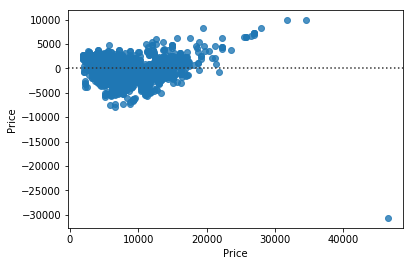

In [64]:
sns.residplot(ytest, residual)

There is no pattern in the residual

### Normality

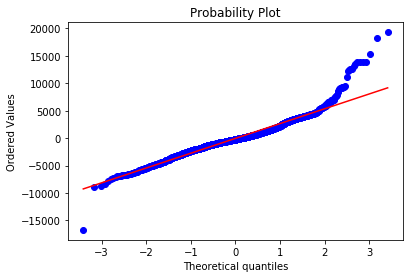

In [67]:
stats.probplot(residual, plot=pylab)
plt.show()

In [69]:
shapiro(residual)

(0.9397127628326416, 1.2121539458312124e-28)

As we can see that the p value is less than the alpha(0.05). so if the p value is less than alpha we reject the H0 which the data is normal. so by this we can say that the data is not normal and we reject the H0

### Hetroscedasticity

In [78]:
sts.het_goldfeldquandt(residual, xtest)

(0.991223212448145, 0.5566674878294384, 'increasing')

the p value is greater than the alpha (0.05) so we can say that the we fail to reject the H0 which is the data is not hetroscedasticity.

### Auto-Correlation

In [79]:
sts.stattools.durbin_watson(residual,axis=0)  #mild correlation (negative)

2.024980441551304